Work in progress..

In [1]:
# Import the needed packages
import numpy as np
import matplotlib.pylab as plt
from tomopy.misc.phantom import shepp2d

In [2]:
from interp2d import wamfit

In [3]:
def plot_image(img, fig_name, pts=None):
    plt.imshow(img, vmin=0, vmax=1)
    plt.axis('off')
    if pts:
        plt.plot(pts[0], pts[1], 'r.')
    plt.savefig('%s.eps' %fig_name,bbox_inches='tight')
    plt.savefig('%s.png' %fig_name,bbox_inches='tight')
    plt.show()
# Define the MSE
def mse(ftrue, fapprox, N):
    return np.sum((ftrue-fapprox)**2)/N

In [4]:
# Fix the numer of data and polynomial degree
N = 256 # Fix the number of evaluation points in one direction 
deg = 4 # Fix the polynomial degree
arr = np.array([32,48,64,96,128]) # Fix the number of points in one direction
MseStandard =[]; MseFakeNodes = [] # Initialize

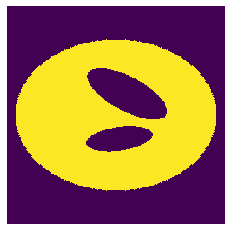

In [11]:
# Compute the function values for testin the performances of the method
P = (shepp2d(size = N)).T.reshape(N,N)

plot_image(P, 'images/SheppOriginal_%d.png'%N, pts=None)
# Compute the grid for the evaluation points
X, Y = np.meshgrid(np.transpose(np.linspace(0,N,N)),\
                   np.transpose(np.linspace(0,N,N)))
X, Y = X.ravel(), Y.ravel()
TrueSolution = P.ravel() 
# Compute the fake evaluation nodes
XF, YF = X.copy(), Y.copy() # Initialize
ShiftParameter = np.array([0,1.1,2.1,3.1,4.1,5.1]).dot(2*N)

In [9]:
# Compute the fake evaluation nodes
for i in range(0,TrueSolution.shape[0]):
    if abs(TrueSolution[i]-0)<0.01:
        XF[i] = X[i]+ShiftParameter[0]
        YF[i] = Y[i]+ShiftParameter[0]
    if abs(TrueSolution[i]-0.1)<0.05:
        XF[i] = X[i]+ShiftParameter[1]
        YF[i] = Y[i]+ShiftParameter[1]
    if abs(TrueSolution[i]-0.2)<0.05:
        XF[i] = X[i]+ShiftParameter[2]
        YF[i] = Y[i]+ShiftParameter[2]
    if abs(TrueSolution[i]-0.3)<0.05:
        XF[i] = X[i]+ShiftParameter[3]
        YF[i] = Y[i]+ShiftParameter[3]
    if abs(TrueSolution[i]-0.4)<0.05:
        XF[i] = X[i]+ShiftParameter[4]
        YF[i] = Y[i]+ShiftParameter[4]
    if abs(TrueSolution[i]-1)<0.05:
        XF[i] = X[i]+ShiftParameter[5]
        YF[i] = Y[i]+ShiftParameter[5]

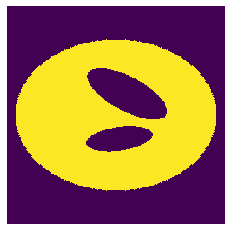

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 65536 is different from 1024)

In [14]:

for j in range(0,5):
    n = int(arr[j])
    P = (shepp2d(size = N)).T.reshape(N,N)
    plot_image(P, 'Subsampled_Shepp_%d.eps'%n, pts=None)
    # Construct the function values for interpolation
    x, y = np.meshgrid(np.transpose(np.linspace(0,n,n)),\
                   np.transpose(np.linspace(0,n,n)))
    x, y = x.ravel(), y.ravel()
    # Compute the fake evaluation nodes
    xF, yF = x.copy(), y.copy() # Initialize    
    f = P.ravel()
    cfs, lsp = wamfit(deg,((np.vstack((x,y)).T)/n), \
                       ((np.vstack((X,Y)).T)/N), f)
    
    MseStandard = np.hstack((MseStandard,\
                              mse(lsp, np.matrix(TrueSolution).T, \
                                  (lsp.shape[0]))))
    plot_image(np.reshape(lsp, (N,N)),\
               'Standard_poly_reconstruction_%d.eps'%n, pts=None)
    for i in range(0,f.shape[0]):
        if abs(f[i]-0)<0.01:
            xF[i] = x[i]+ShiftParameter[0]
            yF[i] = y[i]+ShiftParameter[0]
        if abs(f[i]-0.1)<0.05:
            xF[i] = x[i]+ShiftParameter[1]
            yF[i] = y[i]+ShiftParameter[1]
        if abs(f[i]-0.2)<0.05:
            xF[i] = x[i]+ShiftParameter[2]
            yF[i] = y[i]+ShiftParameter[2]
        if abs(f[i]-0.3)<0.05:
            xF[i] = x[i]+ShiftParameter[3]
            yF[i] = y[i]+ShiftParameter[3]
        if abs(f[i]-0.4)<0.05:
            xF[i] = x[i]+ShiftParameter[4]
            yF[i] = y[i]+ShiftParameter[4]
        if abs(f[i]-1)<0.05:
            xF[i] = x[i]+ShiftParameter[5]
            yF[i] = y[i]+ShiftParameter[5]


    # Compute the Least square approximant    
    cfs, lsp = wamfit(deg, (np.vstack((xF,yF))/np.max((np.max(xF), \
    (np.max(yF))))).T, (np.vstack((XF,YF))/np.max((np.max(XF), \
    (np.max(YF))))).T, f)
    
    MseFakeNodes = np.hstack((MseFakeNodes,\
                               mse(lsp, np.matrix(TrueSolution).T, \
                                    (lsp.shape[0])))) 
    
    plot_image(np.reshape(lsp, (N,N)), \
               'images/Fake_poly_reconstruction_%d.eps'%n, pts=None)
    

In [ ]:
# Save the results  
Outfile = open('ResultsSL.txt',"w")
out_string = 'MSE with standard nodes: %s\n' %(MseStandard)
out_string += 'MSE with fake nides: %s\n' %(MseFakeNodes)
Outfile.write(out_string)   
Outfile.close()
# Plot
plt.semilogy(arr**2, MseStandard, 'g*-',arr**2, MseFakeNodes,'ro-')
plt.xlabel('n')
plt.ylabel('MSE')
plt.legend(['Equispaced','Fake points'])
plt.grid()
plt.savefig("images/ErrorSL.png")